In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
FILE_PATH = [
    "/workspace/plane-nerf/outputs/jackal_training_data_1/plane-nerf/2024-02-27_113348/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_half/plane-nerf/2024-03-08_124819/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_fifth/plane-nerf/2024-03-08_173448/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_3_spins/plane-nerf/2024-03-09_182906/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_3_spins_half/plane-nerf/2024-03-09_115621/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_3_spins_fifth/plane-nerf/2024-03-09_195455/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_1_spins/plane-nerf/2024-03-09_221824/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_1_spins_half/plane-nerf/2024-03-09_213227/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1_1_spins_fifth/plane-nerf/2024-03-09_205043/metrics.csv"
]
# Open csv file as np array
data = []
for i in range(len(FILE_PATH)):
    data.append(np.genfromtxt(FILE_PATH[i], delimiter=',', names=['psnr', 'ssim', 'lpips',"psnr_masked", "ssim_masked", "lpips_masked"]))
    data[i] = np.array([list(data[i][j]) for j in range(len(data[i]))])
data = np.array(data)
# Mean PSNR
mean_psnr = np.mean(data[:,:,0], axis=1)
# Mean SSIM
mean_ssim = np.mean(data[:,:,1], axis=1)
# Mean LPIPS
mean_lpips = np.mean(data[:,:,2], axis=1)
print(f"Mean PSNR: {mean_psnr}")
print(f"Mean SSIM: {mean_ssim}")
print(f"Mean LPIPS: {mean_lpips}")

# Mean PSNR
mean_psnr_masked = np.mean(data[:,:,3], axis=1)
# Mean SSIM
mean_ssim_masked = np.mean(data[:,:,4], axis=1)
# Mean LPIPS
mean_lpips_masked = np.mean(data[:,:,5], axis=1)
print(f"Mean PSNR Masked: {mean_psnr_masked}")
print(f"Mean SSIM Masked: {mean_ssim_masked}")
print(f"Mean LPIPS Masked: {mean_lpips_masked}")

Mean PSNR: [18.60163692 17.3253847  19.94056624 20.10848811 20.37253735 20.61171649
 21.42321652 21.1316203  21.76021138]
Mean SSIM: [0.54596922 0.54711508 0.31305473 0.44734479 0.35070232 0.33528231
 0.260926   0.26112335 0.3436437 ]
Mean LPIPS: [0.61164386 0.72456969 0.87114106 0.82387332 0.87524847 0.85644241
 0.91236728 0.91454217 0.89807762]
Mean PSNR Masked: [40.98648815 43.15484352 34.00342682 40.42983646 33.62601863 33.34532172
 33.57860476 33.48159549 33.3067347 ]
Mean SSIM Masked: [0.99345859 0.99512946 0.98500199 0.99295186 0.98547095 0.98429211
 0.98375053 0.98372577 0.98448551]
Mean LPIPS Masked: [0.00255774 0.00188416 0.01556067 0.0047852  0.01594601 0.01708746
 0.01713999 0.01707737 0.01672309]


In [21]:
n = 8

print(f"{mean_psnr[n]} & {mean_ssim[n]} & {mean_lpips[n]} & {mean_psnr_masked[n]} & {mean_ssim_masked[n]} & {mean_lpips_masked[n]}")

#TO 3 signficant figures
print(f"{mean_psnr[n]:.1f} & {mean_ssim[n]:.3f} & {mean_lpips[n]:.3f} & {mean_psnr_masked[n]:.1f} & {mean_ssim_masked[n]:.3f} & {mean_lpips_masked[n]:.5f}")

21.76021138191223 & 0.34364370480179784 & 0.8980776247382164 & 33.30673470497131 & 0.9844855120778084 & 0.01672308677341789
21.8 & 0.344 & 0.898 & 33.3 & 0.984 & 0.01672


Text(0, 0.5, 'LPIPS (Masked)')

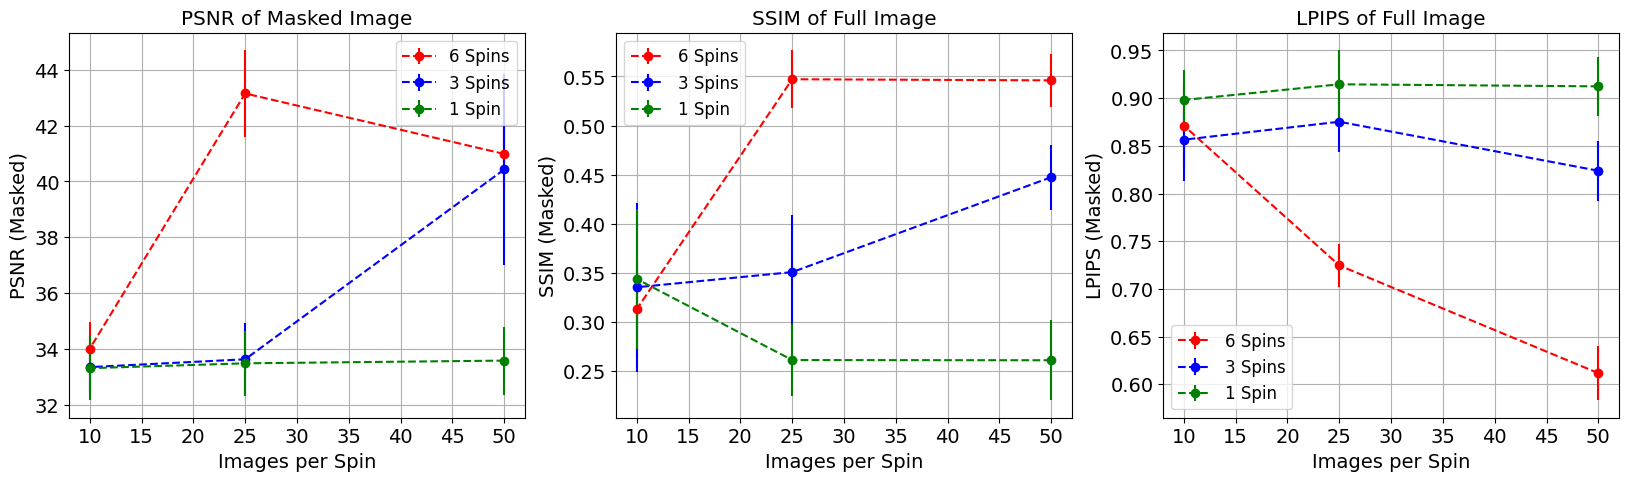

In [22]:
spins = [50, 25, 10]

psnr_masked_6_spin = data[0:3,:,3]
psnr_masked_3_spin = data[3:6,:,3]
psnr_masked_1_spin = data[6:9,:,3]

ssim_masked_6_spin = data[0:3,:,1]
ssim_masked_3_spin = data[3:6,:,1]
ssim_masked_1_spin = data[6:9,:,1]

lpips_masked_6_spin = data[0:3,:,2]
lpips_masked_3_spin = data[3:6,:,2]
lpips_masked_1_spin = data[6:9,:,2]

#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

# PSNR
axs[0].errorbar(spins, np.mean(psnr_masked_6_spin, axis=1), np.std(psnr_masked_6_spin, axis=1), label="6 Spins", color='r', linestyle='--', marker='o')
axs[0].errorbar(spins, np.mean(psnr_masked_3_spin, axis=1), np.std(psnr_masked_3_spin, axis=1), label="3 Spins", color='b', linestyle='--', marker='o')
axs[0].errorbar(spins, np.mean(psnr_masked_1_spin, axis=1), np.std(psnr_masked_1_spin, axis=1), label="1 Spin", color='g', linestyle='--', marker='o')
axs[0].grid(True)
axs[0].legend()
axs[0].set_title('PSNR of Masked Image')
axs[0].set_xlabel('Images per Spin')
axs[0].set_ylabel('PSNR (Masked)')

# SSIM
axs[1].errorbar(spins, np.mean(ssim_masked_6_spin, axis=1), np.std(ssim_masked_6_spin, axis=1), label="6 Spins", color='r', linestyle='--', marker='o')
axs[1].errorbar(spins, np.mean(ssim_masked_3_spin, axis=1), np.std(ssim_masked_3_spin, axis=1), label="3 Spins", color='b', linestyle='--', marker='o')
axs[1].errorbar(spins, np.mean(ssim_masked_1_spin, axis=1), np.std(ssim_masked_1_spin, axis=1), label="1 Spin", color='g', linestyle='--', marker='o')
axs[1].grid(True)
axs[1].legend()
axs[1].set_title('SSIM of Full Image')
axs[1].set_xlabel('Images per Spin')
axs[1].set_ylabel('SSIM (Masked)')

# LPIPS
axs[2].errorbar(spins, np.mean(lpips_masked_6_spin, axis=1), np.std(lpips_masked_6_spin, axis=1), label="6 Spins", color='r', linestyle='--', marker='o')
axs[2].errorbar(spins, np.mean(lpips_masked_3_spin, axis=1), np.std(lpips_masked_3_spin, axis=1), label="3 Spins", color='b', linestyle='--', marker='o')
axs[2].errorbar(spins, np.mean(lpips_masked_1_spin, axis=1), np.std(lpips_masked_1_spin, axis=1), label="1 Spin", color='g', linestyle='--', marker='o')
axs[2].grid(True)
axs[2].legend()
axs[2].set_title('LPIPS of Full Image')
axs[2].set_xlabel('Images per Spin')
axs[2].set_ylabel('LPIPS (Masked)')
